The average squared error is 0.031524474082016814
Degree 0: Training Error = 0.7545, Validation Error = 0.5963


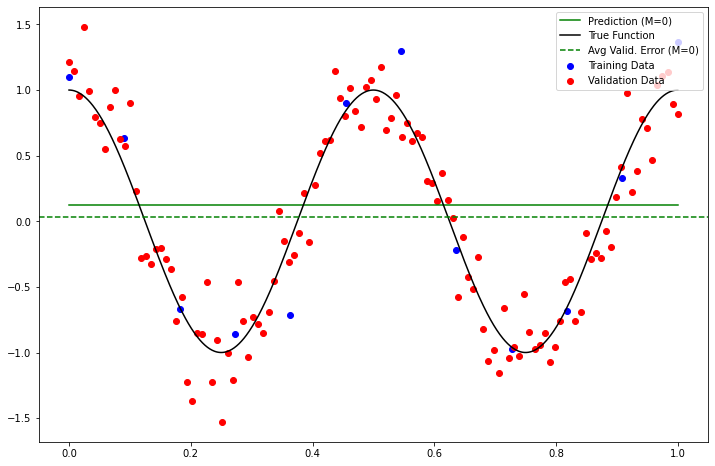

Degree 1: Training Error = 0.7542, Validation Error = 0.5975


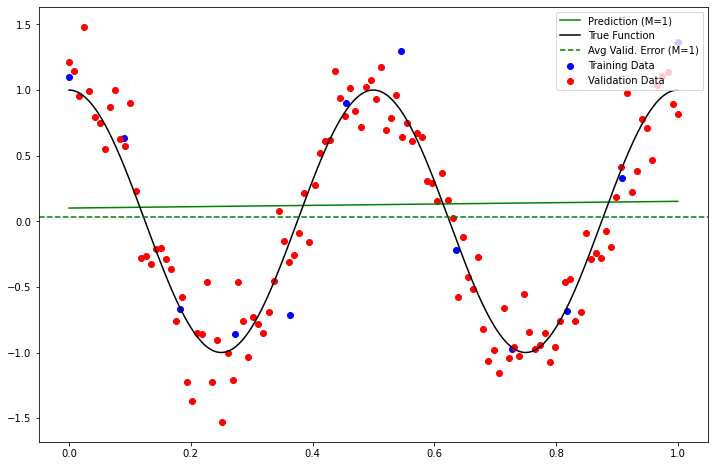

Degree 2: Training Error = 0.6183, Validation Error = 0.5616


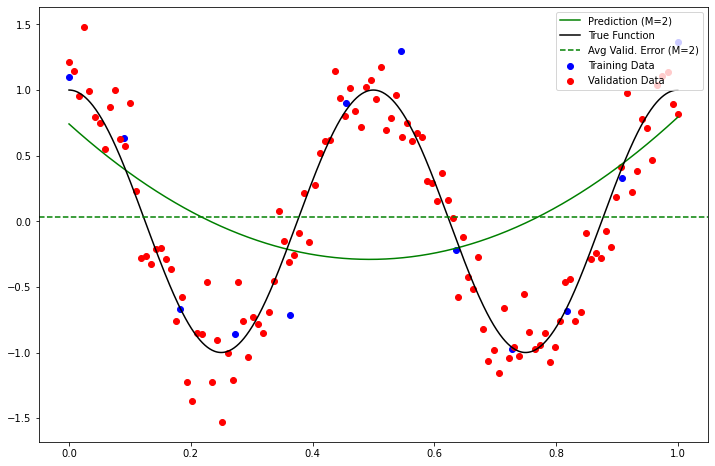

Degree 3: Training Error = 0.6183, Validation Error = 0.5616


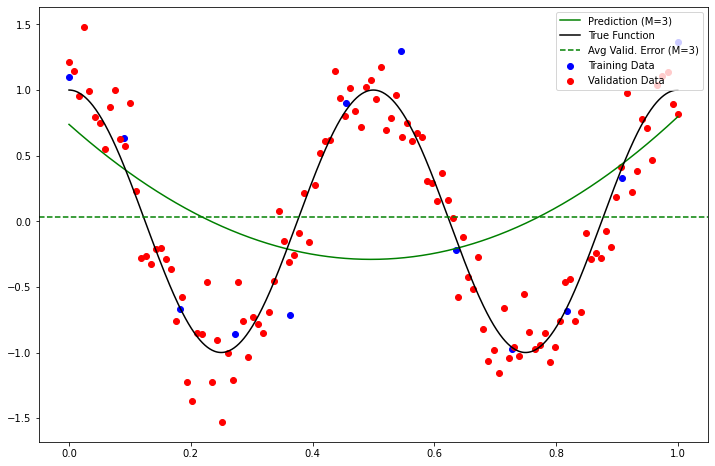

Degree 4: Training Error = 0.3036, Validation Error = 0.2355


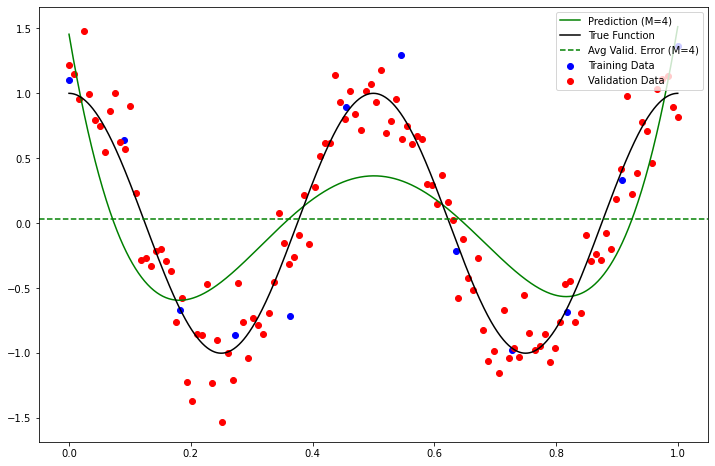

Degree 5: Training Error = 0.2888, Validation Error = 0.2434


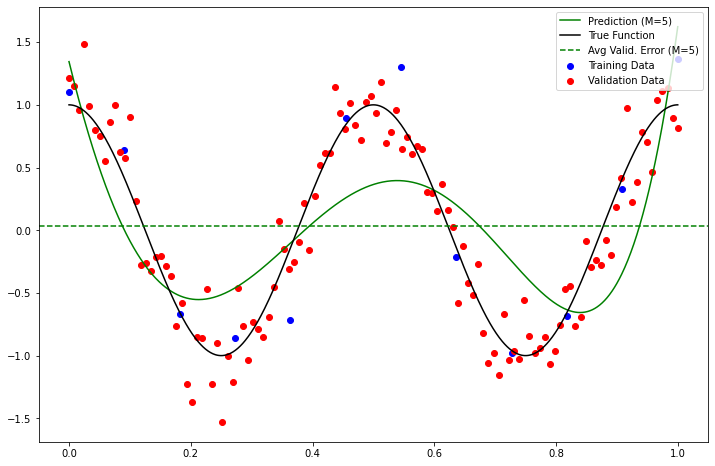

Degree 6: Training Error = 0.0592, Validation Error = 0.0878


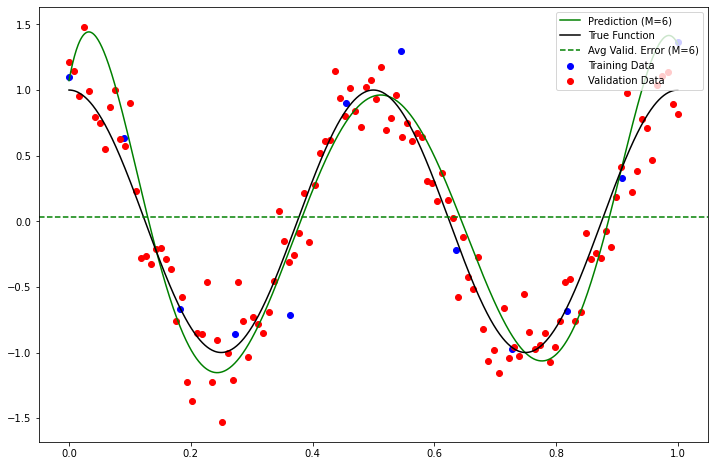

Degree 7: Training Error = 0.0574, Validation Error = 0.0948


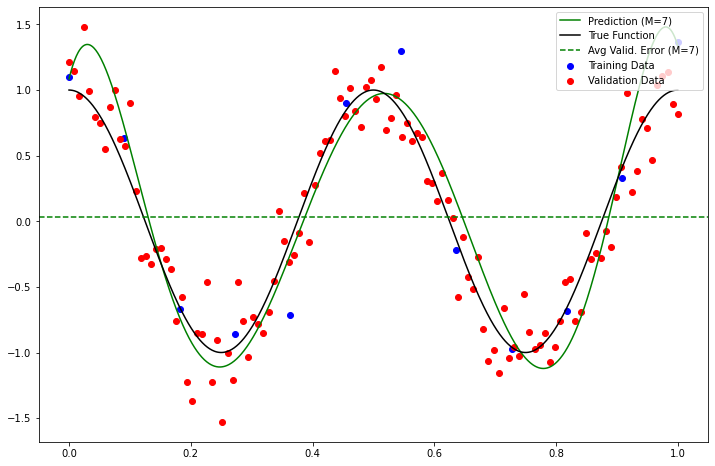

Degree 8: Training Error = 0.0286, Validation Error = 0.0846


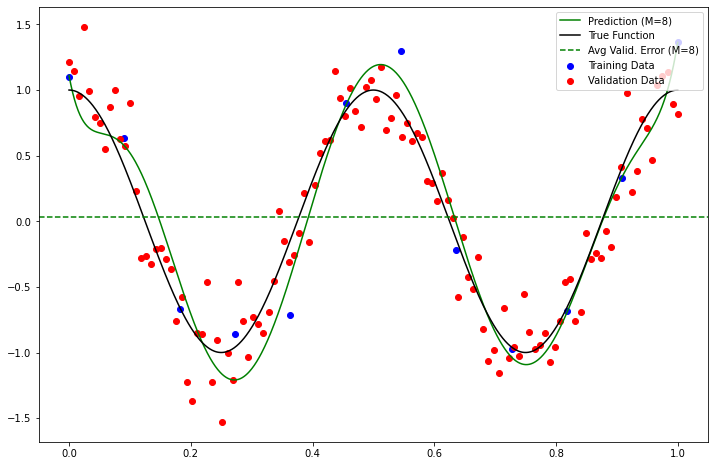

Degree 9: Training Error = 0.0209, Validation Error = 0.1137


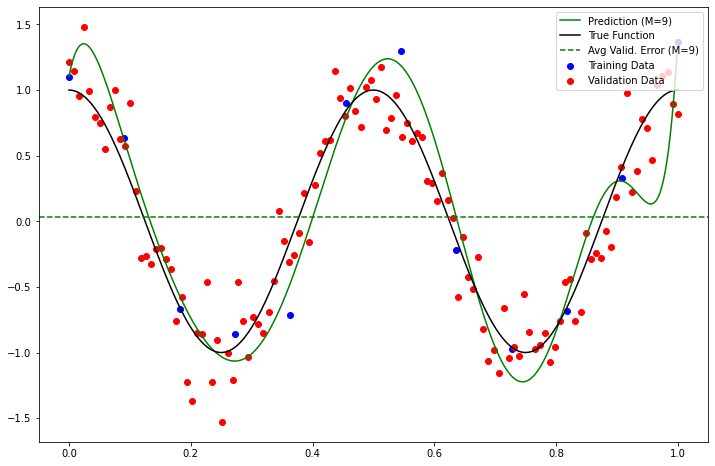

Degree 10: Training Error = 0.0000, Validation Error = 0.5966


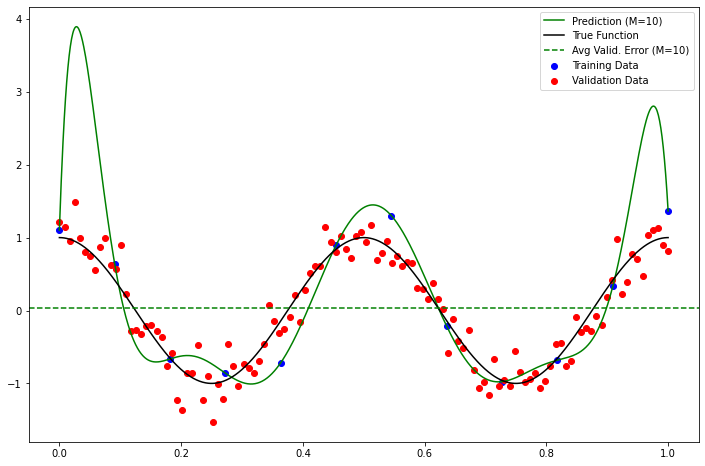

Degree 11: Training Error = 0.0000, Validation Error = 0.6020


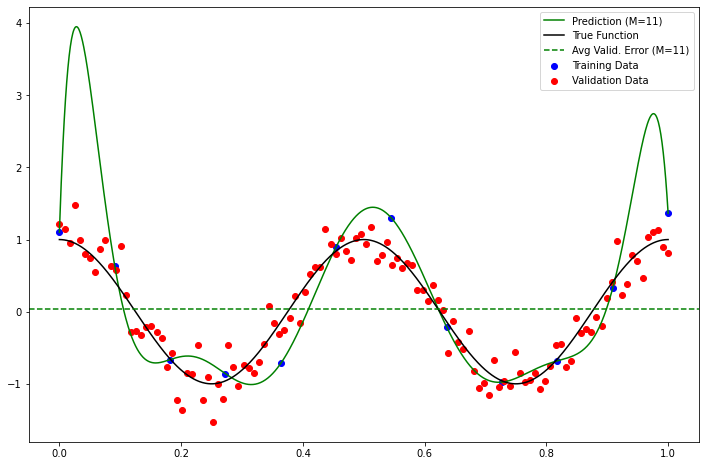

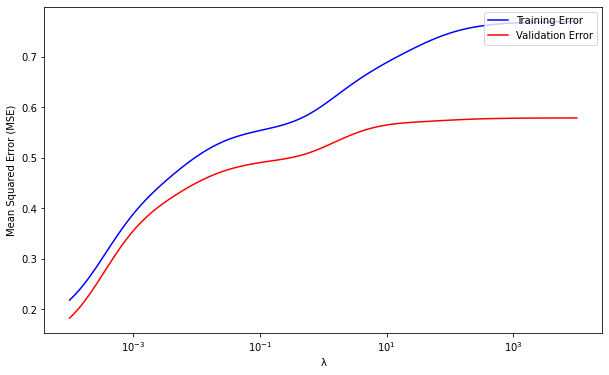

In [19]:
#Hritheekka Chinnakonda, 400292782, chinnakh
# 09/29/2023

# importing neccessary libraries, modules and classes 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# seed for pseudo number generator
seed = 2782  # last four digits of student number

# t is a noisy measurement of function f_true(x), generating true target values
def f_true(x):
    t = np.sin((4*np.pi*x)+(np.pi/2))
    return t

#generating synthetic training and validation data sets
def training_and_validation_data():
    np.random.seed(seed)
    x_training = np.linspace(0,1,12) # returns 12 evenely spaced samples calculated over [0,1] TRAINING SET
    x_validation = np.linspace(0,1,120) # returns 120 evenly spaces samples calculated over [0,1] VALIDATION SET

    # noise is randomly generated
    noise_training = 0.25 * np.random.randn(12)
    noise_validation = 0.25 * np.random.randn(120)

    # output
    y_training = f_true(x_training) + noise_training 
    y_validation = f_true(x_validation) + noise_validation 

    return x_training, y_training, x_validation, y_validation

# train linear model using least squares
def training_model_lstsq(X_mat, t_training):
    return np.linalg.lstsq(X_mat, t_training, rcond=None)[0]

# MSE error calculation
def MSE_errors(coeff, x_values, t_values):
    predictions = np.dot(x_values, coeff) # predicted target values based on linear regression model
    errors = t_values - predictions # difference between model predictions and the true values
    mse = np.mean(errors ** 2) # MSE calculated
    return mse

# plotting data and prediction functions
def data_and_predictions_plot(x_train, t_training, x_valid, t_valid, coeff, M, avg_squared_error):
    plt.figure(figsize=(12, 8)) # plot figure given size
    plt.scatter(x_train, t_training, label="Training Data", color="blue")
    plt.scatter(x_valid, t_valid, label="Validation Data", color="red")
    x_range = np.linspace(0, 1, 1000) # evenly spaced x values [0,1]
    x_range_mat = np.vander(x_range, M + 1, increasing=True) # matrix computing polynomial predictions
    predictions = np.dot(x_range_mat, coeff) # predicted values for output of regression model
    plt.plot(x_range, predictions, label=f"Prediction (M={M})", color="green")
    plt.plot(x_range, f_true(x_range), label="True Function", color="black")
    plt.axhline(avg_squared_error, color='green', linestyle='--', label=f"Avg Valid. Error (M={M})")

    plt.legend(loc="upper right")
    plt.show()

# training regularized linear model
def training_model_regularization(X_mat, t_training, Lambda):
    identity_matrix = np.identity(X_mat.shape[1]) # identity matrix used to apply L2 regularization
    coeff = np.linalg.lstsq(X_mat.T @ X_mat + Lambda * identity_matrix, X_mat.T @ t_training, rcond=None)[0]
    return coeff

# plotting the training and validation errors as a function of Lambda for regularization λ
def errors_vs_lambda_plot(x_train, t_training, x_valid, t_valid, M):
    
    # logarithmically spaced array of 100 values ranging from 10^-4 to 10^4
    lambdas = np.logspace(-4, 4, 100) 
    
    # lists to store training and validation errors for the different values of λ
    training_errors = []
    validation_errors = []

    # iterating each value
    for Lambda in lambdas:
        
        #matrices for both datasets for specific value of M
        X_train_mat = np.vander(x_train, M + 1, increasing=True)
        X_valid_mat = np.vander(x_valid, M + 1, increasing=True)

        #training the regularized linear regression model w specific λ
        coeff = training_model_regularization(X_train_mat, t_training, Lambda)
        
        # calculating MSE for both datasets
        training_error = MSE_errors(coeff, X_train_mat, t_training)
        validation_error = MSE_errors(coeff, X_valid_mat, t_valid)

        # adding the values to the lists
        training_errors.append(training_error)
        validation_errors.append(validation_error)

    # plotting training and validation errors logarithmic scale for λ
    plt.figure(figsize=(10, 6))
    plt.semilogx(lambdas, training_errors, label="Training Error", color="blue")
    plt.semilogx(lambdas, validation_errors, label="Validation Error", color="red")
    plt.xlabel("λ")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend(loc="upper right")
    plt.show()


def main():
    
    # generating training and validation datasets
    x_train, t_training, x_valid, t_valid = training_and_validation_data() 

    degrees = np.arange(0, 12) # degree for polynomials
    
    # calculating the average error between validation and true function
    avg_squared_error = np.square(np.sum(np.abs(f_true(x_valid) - t_valid)) / t_valid.shape[0])
    print(f"The average squared error is {avg_squared_error}")
    
    # iterating each degree value
    for M in degrees:
        # creating matrices for both datasets
        X_train_matrix = np.vander(x_train, M + 1, increasing=True)
        X_valid_matrix = np.vander(x_valid, M + 1, increasing=True)
        
        #training the regression model w specific M
        coeff = training_model_lstsq(X_train_matrix, t_training) 

        #calculating MSE
        training_error = MSE_errors(coeff, X_train_matrix, t_training)
        validation_error = MSE_errors(coeff, X_valid_matrix, t_valid)

        # outputting M, the training error and validation error
        print(f"Degree {M}: Training Error = {training_error:.4f}, Validation Error = {validation_error:.4f}")
        
        # plotting data
        data_and_predictions_plot(x_train, t_training, x_valid, t_valid, coeff, M, avg_squared_error)

    # plotting training and validation errors as λ changes     
    M = 11 
    errors_vs_lambda_plot(x_train, t_training, x_valid, t_valid, M)
    
    

if __name__ == '__main__':
    main()
